In [ ]:
#Day 1 small dataset
def day1_a(input_file):

    numbers = [int(x) for x in open(input_file).read().split()]
    list_a = sorted(numbers[0::2])
    list_b = sorted(numbers[1::2])
    diff_sum = 0

    for a,b in zip(list_a,list_b):
        diff_sum += abs(a-b)

    return diff_sum

# small input set
print( day1_a("./data/01a_input.txt"))

1765812


In [17]:
# Day 1b

numbers = [int(x) for x in open("./data/01a_input.txt").read().split()]
list_a = sorted(numbers[0::2])
list_b = sorted(numbers[1::2])
from collections import Counter

count = Counter(list_b)

out = [a*count[a] for a in list_a ]
sum(out)

20520794

In [2]:
#Day 2a 

lines = [x for x in open("./data/02_input.txt").read().split('\n') if x.strip() != ""]

def check(level):
    
    if len (level) <= 1: 
        return True 
    
    if (level[0] > level[1]):
        #check incremeent
        for a, b in zip(level[:-1],level[1:]):
            if a -b < 1 or a - b > 3:
                return False 
        return True 
    elif (level[0] < level[1] ) :
        for a, b in zip(level[:-1],level[1:]):
            if b-a < 1 or b - a > 3:
                return False
        return True
    elif (level[0] == level[1]): return False      
    
    

           

safe_count = 0

for line in lines:
    level = [int(x) for x in line.split()]
    if (check(level)): 
        safe_count += 1
        #print (line)


print (safe_count)


472


In [9]:
#Day 2b
lines = [x for x in open("./data/02_input.txt").read().split('\n') if x.strip() != ""]

#brute force check 

            
safe_count_damped = 0
for line in lines:
    A = [int(x) for x in line.split()]
    if (check(A)): safe_count_damped +=1
    else: 
        for k in range(len(A)):
            B = A[:k]+A[k+1:]
            if (check(B)): 
                safe_count_damped +=1
                break
    

print (safe_count_damped)

 

520


In [ ]:
#Day 3a
import re 
s = "xmul(2,4)%&mul[3,7]!@^do_not_mul(5,5)+mul(32,64]then(mul(11,8)mul(8,5))"

s = open("data/03_input.txt").read()
muls = re.findall(r"mul\(\d+,\d+\)",s)

sum = 0
for mul in muls:
    a, b = mul[4:-1].split(',')
    sum += (int(a)*int(b))

print (sum)

162813399


In [88]:
#Day 3b

s = "xmul(2,4)&mul[3,7]!^don't()_mul(5,5)+mul(32,64](mul(11,8)undo()?mul(8,5))"

pattern = r"don't|do|mul\(\d+,\d+\)"

s = open("data/03_input.txt").read()
match = re.findall(pattern, s )
flag = True
sum = 0
for m in match:
    if m == 'do': flag = True
    elif m == "don't": flag = False
    elif (flag):
            a, b = m[4:-1].split(',')
            sum += (int(a)*int(b))
    
#print (match)
print (sum)

53783319


In [73]:
i = 0
for d, m in match: 
    if d == "do":
        i+=1
print (i)

1


In [85]:
s = "xmul(2,4)&mul[3,7]!^don't()_mul(5,5)+mul(32,64](mul(11,8)undo()?mul(8,5))"

pattern = r"don't|do|mul\(\d+,\d+\)"
match = re.findall(pattern, s )
match

['mul(2,4)', "don't", 'mul(5,5)', 'mul(11,8)', 'do', 'mul(8,5)']

In [ ]:
#Day 4a: Ceres Search

import re 

data = open("data/04_input.txt").read()
#print (data)
data = data.split()
w = len(data[0])
h = len(data)
print (w,h)

total = 0

pattern = r"XMAS"

#HF (Horizontal Forwared) and HB (Hrizontal Backword)
count = 0
for line in data:
    count += len(re.findall(pattern, line))
    count += len(re.findall(pattern, line[::-1]))

print (count)

#VF & VB
for j in range (w):
    A = ""
    for i in range (h):
        A = A+data[i][j]
    #print (A)
    count += len(re.findall(pattern, A))
    count += len(re.findall(pattern, A[::-1]))

print (count)

#DF % DB
for i in range (h):
    A = ""
    for j in (range(i+1)):
        #print (i-j,j)
        A = A + data[i-j][j]
       #print (A )
    count += len(re.findall(pattern, A))
    count += len(re.findall(pattern, A[::-1])) 

print (count)
for j in range (1,w):
    A = ""
    for k in range(j,w):
        #print (h-k+j-1,k)
        A = A + data[h-k+j-1][k]

    count += len(re.findall(pattern, A))
    count += len(re.findall(pattern, A[::-1]))

       #print (A )



print (count)
#AF % AB
for i in range (h):
    A = ""
    for j in (range(i+1)):
        #print (i-j,j)
        A = A + (data[i-j])[::-1][j]
       #print (A )
    count += len(re.findall(pattern, A))
    count += len(re.findall(pattern, A[::-1])) 
print (count)

for j in range (1,w):
    A = ""
    for k in range(j,w):
        #print (h-k+j-1,k)
        A = A + (data[h-k+j-1])[::-1][k]

    count += len(re.findall(pattern, A))
    count += len(re.findall(pattern, A[::-1]))
print(count)

140 140
434
855
1265
1671
2079
2483


In [110]:
#Day 4b
data = open("data/04_input.txt").read()
#print (data)
data = data.split()
#data = ["abcd","efgh","ijkl","mnop"]
def check_X_MAS(B):
    #print ("in check")
    #print (len(B))
    if B[0][0] == 'M' and B[0][2]=='S' and B[1][1]=='A' and B[2][0]=='M' and B[2][2]=='S': return True 
    if B[0][0] == 'M' and B[0][2]=='M' and B[1][1]=='A' and B[2][0]=='S' and B[2][2]=='S': return True 
    if B[0][0] == 'S' and B[0][2]=='S' and B[1][1]=='A' and B[2][0]=='M' and B[2][2]=='M': return True 
    if B[0][0] == 'S' and B[0][2]=='M' and B[1][1]=='A' and B[2][0]=='S' and B[2][2]=='M': return True 
    return False


w = len(data[0])
h = len(data)
x_count = 0

for i in range(h-3+1):
    #print (i)
    for j in range (w-3+1):
        B = []
        for ii in range(3):
            B.append("")
            for jj in range(3):
                B[ii]=B[ii]+(data[i+ii][j+jj])
        #print (B)
        #break
        if check_X_MAS(B): x_count += 1



print (x_count)


1925


In [64]:
#Day5a Print Queue 
data = [x for x in open("./data/05_input.txt").read().split() if x != ""]

#Violating_Rule_set 
R = set()

total = 0
for line in data:
    if "|" in line:
        a,b = line.split("|")
        R.add((int(b),int(a)))

    else: 
        V = [int(x) for x in line.split(",")]
        #print (V)
        
        #edge set
        E = set()
        for i in range(len(V)):
            for j in range(i+1,len(V)):
                #print (V[i],V[j])
                E.add((V[i],V[j]))

        if( not R&E):
            total += V[len(V)//2] 


print(total)

6034


In [ ]:
#Day5b Print Queue 
data = [x for x in open("./data/05_input.txt").read().split() if x != ""]

def check_violation(A,a,b):
    if A.index(a)<A.index(b): return True
    return False 

def swap_elements(A,a,b):
    i = A.index(a)
    j = A.index(b)
    A[i],A[j] = A[j],A[i]

def create_edge_set(V):
    E = set()
    for i in range(len(V)):
        for j in range(i+1,len(V)):
            #print (V[i],V[j])
            E.add((V[i],V[j]))
    return E 

#Violating_Rule_set 
R = set()

total = 0
for line in data:
    if "|" in line:
        a,b = line.split("|")
        R.add((int(b),int(a)))

    else: 
        V = [int(x) for x in line.split(",")]
      
        E = create_edge_set(V)

        #violating edge set M
        M =  (R&E)
        if (M):
            while True: 
                #flag = True
                for (a,b) in M: 
                    if check_violation(V, a, b):
                        swap_elements(V,a,b)
                new_E = create_edge_set(V)
                M = R & new_E 
                if not M:
                    break

            total += V[len(V)//2]

print(total)

6305


In [ ]:
#6693
A = [2,5,4,3,6]

def check_violation(A,a,b):
    if A.index(a)<A.index(b): return True
    return False 



False

In [77]:
A = {(1,2),(3,4)}

for (a,b) in A: 
    print (a,b )



1 2
3 4


In [81]:
A = [1,2,3,4]
def swap_elements(A,a,b):
    i = A.index(a)
    j = A.index(b)
    A[i],A[j] = A[j],A[i]

swap_elements(A,2,4)
A

[1, 4, 3, 2]

In [26]:
#Day 6a: Guard Gallivant 

A = [list(x.strip()) for x in open("data/06_input.txt").read().split("\n") if x != ""]

h = len(A)
w = len(A[0])
print(h,w)


i=0
j=0

# Up (-1,0), Right (0,1), Down (1,0), Left(0,-1)

delta = [-1,0]

for ii in range(h): 
    for jj in range(w): 
        #print (A[ii][jj])
        if A[ii][jj] == '^': 

            i,j = ii,jj
            


while i>=0 and j>=0 and i<len(A) and j <len(A[0]):
    
    if A[i][j] == '#':
        #step back 
        i -= delta[0]
        j -= delta[1] 
        #turn 
        delta[0], delta[1] = delta[1], (-delta[0])


    #Mark
    A[i][j] = 'X'
    #Move 
    i += delta[0]
    j += delta[1]

count = 0
for ii in range(h):
    for jj in range(w):
        if A[ii][jj] == 'X':
            count +=1

print (count )



130 130
5131


In [45]:
# Day6b
import copy

B = [list(x.strip()) for x in open("data/06_input.txt").read().split("\n") if x != ""]

h = len(B)
w = len(B[0])
print(h,w)



def check_loop(A,x,y):

    h = len(A)
    w = len(A[0])
    i = 0
    j = 0

    for ii in range(h): 
        for jj in range(w): 
            #print (A[ii][jj])
            if A[ii][jj] == '^': 
                i,j = ii,jj
    
    if i==x and j==y :
        return False
    
    A[x][y] = '#'
    #flag = False
    dejavu = 0
    delta = [-1,0]
    
    while i>=0 and j>=0 and i<len(A) and j <len(A[0]) and dejavu< h*w:
        if A[i][j] == '#':
            #step back 
            i -= delta[0]
            j -= delta[1] 
            dejavu -=1
            #turn 
            delta[0], delta[1] = delta[1], (-delta[0])


        #Mark
        A[i][j] = 'X'
        #Move 
        i += delta[0]
        j += delta[1]
        dejavu +=1

    if dejavu == h*w:
        return True
    else:
        return False    


obst_count=0
for ii in range(h):
    
    for jj in range(w):
        A = copy.deepcopy(B)
        #print (ii,jj)
        if check_loop(A,ii,jj):
            obst_count +=1
    if (ii%5==0 ):
        print (ii)
        print ("obst_count:",obst_count)

print (obst_count)

        



130 130
0
obst_count: 0
5
obst_count: 19
10
obst_count: 98
15
obst_count: 159
20
obst_count: 215
25
obst_count: 278
30
obst_count: 392
35
obst_count: 478
40
obst_count: 578
45
obst_count: 677
50
obst_count: 773
55
obst_count: 878
60
obst_count: 985
65
obst_count: 1086
70
obst_count: 1144
75
obst_count: 1236
80
obst_count: 1317
85
obst_count: 1388
90
obst_count: 1490
95
obst_count: 1554
100
obst_count: 1651
105
obst_count: 1688
110
obst_count: 1725
115
obst_count: 1755
120
obst_count: 1770
125
obst_count: 1778
1784


In [8]:
#Day 7a: Bridge Repair

lines = [x for x in open("data/07_input.txt").read().split("\n")]

T_value = []
data = []
for line in lines:
    val, components = line.split(": ",maxsplit=1)
    T_value.append(int(val))

    data.append( [int(x) for x in components.split()] )

#print (T_value)
#print (data)

total = 0

for val, comps in zip(T_value,data):
    A = [comps[0]]
    for i in range(1,len(comps)):
        #double
        B = [x + comps[i] for x in A] + [x * comps[i] for x in A]
        A = B
    if val in A: 
        total += val

print (total )

5030892084481


In [ ]:

#Day 7b: Bridge Repair

lines = [x for x in open("data/07_input.txt").read().split("\n")]

T_value = []
data = []
for line in lines:
    val, components = line.split(": ",maxsplit=1)
    T_value.append(int(val))

    data.append( [int(x) for x in components.split()] )

#print (T_value)
#print (data)

total = 0

for val, comps in zip(T_value,data):
    A = [comps[0]]
    for i in range(1,len(comps)):
        #Add and Mult
        B = [x + comps[i] for x in A] + [x * comps[i] for x in A] 
        #Concat
        C = [int(str (x)+str(comps[i]) ) for x in A]
        A = B + C 
             
    if val in A: 
        total += val


print (total )

91377448644679


In [56]:
# Day 8a: Resonant Collinearity
import copy
A = [list(x.strip()) for x in open("data/08_test.txt").read().split("\n") if x != ""]
h = len(A)
w = len(A[0])
A
#B is the state
B = copy.deepcopy(A)


def get_antinode(x1,y1,x2,y2):
    dx = x2-x1
    dy = y2-y1
    nx = x2 + dx
    ny = y2 + dy
    return nx, ny
def check_lim(x,y,h,w):
    if x>=0 and y>=0 and x<h and y<w : return True
    else: return False
print ("w,h",w,h)
for i1 in range(w):
    for j1 in range(h):
        for i2 in range(w):
            for j2 in range(h):
                if i1!=i2 and j1!=j2 and A[i1][j1]!= '.' and A[i1][j1] == A[i2][j2]: 
                    #print ("found pair:",i1,j1,",",i2,j2,",",A[i1][j1])

                    ni, nj = get_antinode(i1,j1,i2,j2)
                    if check_lim(ni,nj,h,w):
                        B[ni][nj] = '#'


#count antinode 
count = 0
for i in range(w):
    for j in range(h):
                if B[i][j] == '#':
                     count +=1
print ("result:",count)
B


w,h 12 12
result: 14


[['.', '.', '.', '.', '.', '.', '#', '.', '.', '.', '.', '#'],
 ['.', '.', '.', '#', '.', '.', '.', '.', '0', '.', '.', '.'],
 ['.', '.', '.', '.', '#', '0', '.', '.', '.', '.', '#', '.'],
 ['.', '.', '#', '.', '.', '.', '.', '0', '.', '.', '.', '.'],
 ['.', '.', '.', '.', '0', '.', '.', '.', '.', '#', '.', '.'],
 ['.', '#', '.', '.', '.', '.', '#', '.', '.', '.', '.', '.'],
 ['.', '.', '.', '#', '.', '.', '.', '.', '.', '.', '.', '.'],
 ['#', '.', '.', '.', '.', '.', '.', '#', '.', '.', '.', '.'],
 ['.', '.', '.', '.', '.', '.', '.', '.', 'A', '.', '.', '.'],
 ['.', '.', '.', '.', '.', '.', '.', '.', '.', 'A', '.', '.'],
 ['.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '#', '.'],
 ['.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '#', '.']]

In [57]:
#Day 8b
A = [list(x.strip()) for x in open("data/08_input.txt").read().split("\n") if x != ""]
h = len(A)
w = len(A[0])

#B is the state
B = copy.deepcopy(A)

def set_antinode_list(B,x1,y1,x2,y2,h,w):

    nx, ny = get_antinode(x1,y1,x2,y2)

    while check_lim(nx,ny,h,w):
        B[nx][ny] = '#'
        x1,y1 = x2,y2 
        x2,y2 = nx,ny 
        nx, ny = get_antinode(x1,y1,x2,y2)
        
for i1 in range(w):
    for j1 in range(h):
        for i2 in range(w):
            for j2 in range(h):
                if i1!=i2 and j1!=j2 and A[i1][j1]!= '.' and A[i1][j1] == A[i2][j2]: 
                    #print ("found pair:",i1,j1,",",i2,j2,",",A[i1][j1])
                    B[i1][j1] = '#'
                    B[i2][j2] = '#'
                    set_antinode_list(B,i1,j1,i2,j2,h,w)
                    #if check_lim(ni,nj,h,w):
                    #    B[ni][nj] = '#'


#count antinode 
count = 0
for i in range(w):
    for j in range(h):
                if B[i][j] == '#':
                     count +=1
print ("result:",count)
#B



result: 994


In [30]:
# Day 9a: Disk Fragmenter

disk_map = [int(x) for x in list(open("./data/09_input.txt").read().strip())]
#print(disk_map)

disk = []
for i in range(len(disk_map)):
    if i%2==0:
        disk = disk + ([i//2]*disk_map[i])
    else: 
        disk = disk + ([-1]*disk_map[i])

#print(disk )
i = 0
j = len(disk)-1

while i<j:
    while disk[i] != -1 and i<j: 
        i+=1
    #print ("i:",i)
    while disk[j] ==-1 and i<j:
        j-=1 
    disk[i],disk[j] = disk[j],disk[i]
    i+=1
    j-=1
#print(disk)


checksum = 0

for i, a in enumerate(disk):
    if (a==-1):break
    checksum += (i*a)
print (checksum)

6370402949053


In [21]:
# Day9b

disk_map = [int(x) for x in list(open("./data/09_input.txt").read().strip())]
disk = []
for i in range(len(disk_map)):
    if i%2==0:
        disk.append ([i//2]*disk_map[i])
    else: 
        disk.append([-1]*disk_map[i])


j = len(disk)-1

def empty_count(A):
    count = 0
    for a in A:
        if a == -1:
            count +=1
    return count 

def move(A,B):
    i = 0
    while A[i] != -1:
        i+=1
    
    for j in range(len(B)):
        A[i] = B[j]
        B[j]= -1
        i+=1

while j>0:
    i=1
    while empty_count(disk[i])<len(disk[j]) and i<j:
        i += 2
    if i < j: 
        move(disk[i],disk[j])
    j-= 2

#print (disk)

flat_disk = [item for segment in disk for item in segment]

#print ("flat",flat_disk)

checksum = 0

for i, a in enumerate(flat_disk):
    if a != -1:
        checksum += (i*a)

print (checksum)


6398096697992


In [29]:
list_of_lists = [[1, 2], [3, 4], [5]]
flattened = [item for sublist in list_of_lists for item in sublist]
print(flattened)  # Output: [1, 2, 3, 4, 5]

[1, 2, 3, 4, 5]


In [71]:
# Day 10a: Hoof It

# G = [ list(x) for x in open('data/10_test.txt').read().splitlines()]
# G = [[int(x) for x in row] for row in G]

myint = lambda n: int(n) if n.isdigit() else 12

G = [ [myint(n) for n in list(line)] for line in open('data/10_input.txt').read().splitlines()]
# print(G)
h = len(G)
w = len(G[0])

up = lambda i, j: (i,j) if i==0 else (i-1,j)
down = lambda i,j: (i,j) if i==h-1 else (i+1,j)
left = lambda i,j: (i,j) if j==0 else (i,j-1)
right = lambda i,j: (i,j) if j==w-1 else (i,j+1)

moves = [up,down,left,right]



def valid(i,j,ni,nj):
    return True if (G[ni][nj] - G[i][j]) == 1 else False

score = 0
for ii in range(h):
    for jj in range(w):
        if G[ii][jj] == 0:
            # print (f'head at {ii},{jj}')
            st = {} #state
            def dfs(i,j):
                global score
                if st.get((i,j),'white') == 'black':
                    return
                
                st[(i,j)] = 'grey'
                
                if G[i][j] == 9:
                    score +=1
                    st[(i,j)] = 'black'
                    return
                for m in moves:
                    # ni,nj = m(i,j)
                    if valid(i,j,*m(i,j)):
                        dfs(*m(i,j))
                    st[(i,j)] = 'black'

            dfs(ii,jj)



            #start dfs     
score

825

In [ ]:
# Day 10b: Hoof It


myint = lambda n: int(n) if n.isdigit() else 12

G = [ [myint(n) for n in list(line)] for line in open('data/10_input.txt').read().splitlines()]
# print(G)
h = len(G)
w = len(G[0])

up = lambda i, j: (i,j) if i==0 else (i-1,j)
down = lambda i,j: (i,j) if i==h-1 else (i+1,j)
left = lambda i,j: (i,j) if j==0 else (i,j-1)
right = lambda i,j: (i,j) if j==w-1 else (i,j+1)

moves = [up,down,left,right]



def valid(i,j,ni,nj):
    return True if (G[ni][nj] - G[i][j]) == 1 else False


rating = 0

for ii in range(h):

    for jj in range(w):
        if G[ii][jj] == 0:
            # print (f'head at {ii},{jj}')
            st = {} #state
            def dfs(i,j):

                if (i,j) in st:
                    return st[(i,j)]
  
                if G[i][j] == 9:
                    # rating +=1
                    st[(i,j)] = 1
                    return 1
                
                v = 0
                for m in moves:
                    
                    if valid(i,j,*m(i,j)):
                        pc = dfs(*m(i,j))

                        v += pc
                st[(i,j)] = v
             
                return v      
            
            rating += dfs(ii,jj)
   
rating

1805

3


array([[0, 0, 0, 0, 0, 3, 0],
       [0, 0, 1, 1, 1, 3, 0],
       [0, 0, 1, 0, 0, 2, 0],
       [0, 0, 1, 1, 1, 2, 0],
       [0, 0, 1, 0, 0, 1, 0],
       [0, 0, 1, 1, 1, 1, 0],
       [0, 0, 1, 0, 0, 0, 0]], dtype=uint8)

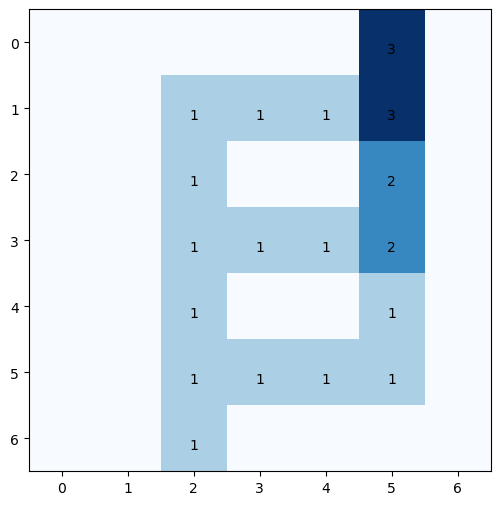

In [30]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# plt.figure(figsize=(16,16))
# plt.imshow(N, cmap='Blues')

# Day 10b: Hoof It


myint = lambda n: int(n) if n.isdigit() else 12

G = [ [myint(n) for n in list(line)] for line in open('data/10_test1.txt').read().splitlines()]
# print(G)
h = len(G)
w = len(G[0])

up = lambda i, j: (i,j) if i==0 else (i-1,j)
down = lambda i,j: (i,j) if i==h-1 else (i+1,j)
left = lambda i,j: (i,j) if j==0 else (i,j-1)
right = lambda i,j: (i,j) if j==w-1 else (i,j+1)

moves = [up,down,left,right]

# dtoa = np.array()

def valid(i,j,ni,nj):
    return True if (G[ni][nj] - G[i][j]) == 1 else False


rating = 0

stop = False
for ii in range(h):
    if stop: break
    for jj in range(w):
        if G[ii][jj] == 0:
            # print (f'head at {ii},{jj}')
            st = {} #state
            def dfs(i,j):

                if (i,j) in st:
                    return st[(i,j)]
  
                if G[i][j] == 9:
                    # rating +=1
                    st[(i,j)] = 1
                    return 1
                
                v = 0
                for m in moves:
                    
                    if valid(i,j,*m(i,j)):
                        pc = dfs(*m(i,j))

                        v += pc
                st[(i,j)] = v
             
                return v      
            
            rating += dfs(ii,jj)
            A = np.zeros((h, w), dtype=np.uint8)

      
            for i in range(A.shape[0]):
                for j in range(A.shape[1]):
                    A[i,j] = st.get((i,j),0)

            plt.figure(figsize=(6,6))
            plt.imshow(A, cmap='Blues')
            for i in range(A.shape[0]):
                for j in range(A.shape[1]):
                    # A[i,j] = st.get((i,j),0)
                    if A[i,j] == 0: continue
                    plt.text(j, i, A[i, j], ha="center", va="top", color='black')
            #stop = True
            #break
   
print(rating)
A
